In [36]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import networkx as nx
import numpy as np

from graph2lammps.convert import gen_pos, write_pdb, write_lammps

# Significant overlaps or bad bonds detected. Attempting pushoff step 1
# No substantial overlaps or bad bonds found after 20 steps...




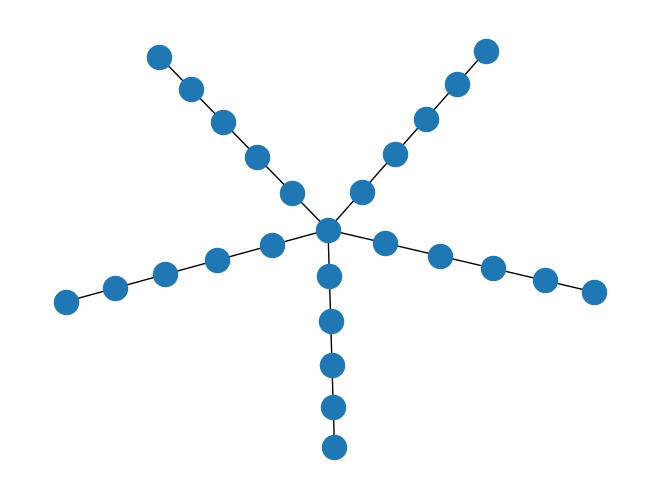

In [49]:
def gen_star(num_arm, len_branch):
    G = nx.Graph()
    G.add_node(0)

    for i in range(1, num_arm + 1):
        arm = nx.path_graph(len_branch)
        arm = nx.relabel_nodes(arm, {j: i*len_branch + j for j in range(len_branch)})
        G = nx.union(G, arm)
        G.add_edge(0, i*len_branch)
    return G

G = gen_star(num_arm=5, len_branch=5)
mapping = {old_label: new_label for new_label, old_label in enumerate(sorted(G.nodes()))}
G = nx.relabel_nodes(G, mapping)

nx.draw(G, pos=nx.kamada_kawai_layout(G))

for node in G.nodes():
    G.nodes[node]['type'] = random.randint(1, 2)
    G.nodes[node]['name'] = string.ascii_uppercase[G.nodes[node]['type'] ]
    
for edge in G.edges():
    G.edges[edge]['type'] = np.random.randint(1, 2)
    
pos = gen_pos(G, rmin=0.5, bdist=1.0, bmin=0.9, bmax=1.1, niter=1000)

G.graph['mass'] = {1: 1, 2:2}

In [50]:
write_lammps(G, pos, fname='sys.data')